In [1]:
import pandas as pd


In [2]:
kickstarter_df = pd.read_csv("./inputs/kickstarter_data_full.csv", low_memory=False)


In [3]:
kickstarter_df.drop(columns=["index", "Unnamed: 0"], inplace=True)


# Naive feature selection

In [4]:
kickstarter_df.drop(columns="id", inplace=True)


In [5]:
kickstarter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        20632 non-null  object 
 1   name                         20632 non-null  object 
 2   blurb                        20626 non-null  object 
 3   goal                         20632 non-null  float64
 4   pledged                      20632 non-null  float64
 5   state                        20632 non-null  object 
 6   slug                         20632 non-null  object 
 7   disable_communication        20632 non-null  bool   
 8   country                      20632 non-null  object 
 9   currency                     20632 non-null  object 
 10  currency_symbol              20632 non-null  object 
 11  currency_trailing_code       20632 non-null  bool   
 12  deadline                     20632 non-null  object 
 13  state_changed_at

# Remove features with more that 50% missing values

In [6]:
kickstarter_df.drop(
    columns=["friends", "is_starred", "is_backing", "permissions"], inplace=True
)


# Remove features with zero variance

In [7]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


Series([], dtype: int64)

# Check rows with missing values

In [8]:
kickstarter_df.isnull().any(axis=1).sum()

1937

In [9]:
kickstarter_df[kickstarter_df.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1937 entries, 120 to 19583
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        1937 non-null   object 
 1   name                         1937 non-null   object 
 2   blurb                        1931 non-null   object 
 3   goal                         1937 non-null   float64
 4   pledged                      1937 non-null   float64
 5   state                        1937 non-null   object 
 6   slug                         1937 non-null   object 
 7   disable_communication        1937 non-null   bool   
 8   country                      1937 non-null   object 
 9   currency                     1937 non-null   object 
 10  currency_symbol              1937 non-null   object 
 11  currency_trailing_code       1937 non-null   bool   
 12  deadline                     1937 non-null   object 
 13  state_changed_at    

In [10]:
kickstarter_df.dropna(inplace=True)

In [11]:
kickstarter_df.reset_index(drop=True, inplace=True)

In [12]:
kickstarter_df.isnull().any(axis=1).sum()

0

In [13]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18695 entries, 0 to 18694
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        18695 non-null  object 
 1   name                         18695 non-null  object 
 2   blurb                        18695 non-null  object 
 3   goal                         18695 non-null  float64
 4   pledged                      18695 non-null  float64
 5   state                        18695 non-null  object 
 6   slug                         18695 non-null  object 
 7   disable_communication        18695 non-null  bool   
 8   country                      18695 non-null  object 
 9   currency                     18695 non-null  object 
 10  currency_symbol              18695 non-null  object 
 11  currency_trailing_code       18695 non-null  bool   
 12  deadline                     18695 non-null  object 
 13  state_changed_at

In [14]:
kickstarter_df["state"].value_counts()

state
failed        10541
successful     5210
canceled       2272
live            465
suspended       207
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
kickstarter_df_encoded = kickstarter_df.copy()

In [18]:
kickstarter_df_encoded["state"] = label_encoder.fit_transform(
    kickstarter_df_encoded["state"]
)

In [19]:
label_encoder.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [20]:
label_encoder.inverse_transform([0, 1, 2, 3, 4])

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [21]:
kickstarter_df_encoded["state"].value_counts()

state
1    10541
3     5210
0     2272
2      465
4      207
Name: count, dtype: int64

# Hyphotesis 1: Is features like "goal", "pleded", 

In [22]:
h1_df = kickstarter_df_encoded[
    ["goal", "pledged", "usd_pledged", "static_usd_rate", "state"]
]


In [23]:
def covert_to_usd(row):
    return (
        row["goal"] * row["static_usd_rate"]
        if row["static_usd_rate"] != 1
        else row["goal"]
    )


In [24]:
h1_df["usd_pledged"] = h1_df.apply(covert_to_usd, axis=1)

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_17584\244741806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1_df["usd_pledged"] = h1_df.apply(covert_to_usd, axis=1)


In [25]:
h1_df.drop(columns=["goal", "static_usd_rate"], inplace=True)

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_17584\3230915881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1_df.drop(columns=["goal", "static_usd_rate"], inplace=True)


In [26]:
h1_df

,pledged,usd_pledged,state
0,0.0,1500.000000,1
1,0.0,500.000000,1
2,120.0,100000.000000,1
3,0.0,5000.000000,1
4,356.0,3591.284600,1
...,...,...,...
18690,25868.0,32522.863425,1
18691,1559.0,105479.669000,1
18692,0.0,10000.000000,1
18693,0.0,2500.000000,1


In [27]:
X = h1_df.drop(columns="state")
y = h1_df["state"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logistic_regression_model = LogisticRegression()

In [32]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
predictions = logistic_regression_model.predict(X_test)

In [41]:
predictions = label_encoder.inverse_transform(predictions)

In [50]:
test_results = pd.DataFrame({"Actual": y_test, "Predicted": predictions})

In [51]:
from sklearn.metrics import confusion_matrix

In [37]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

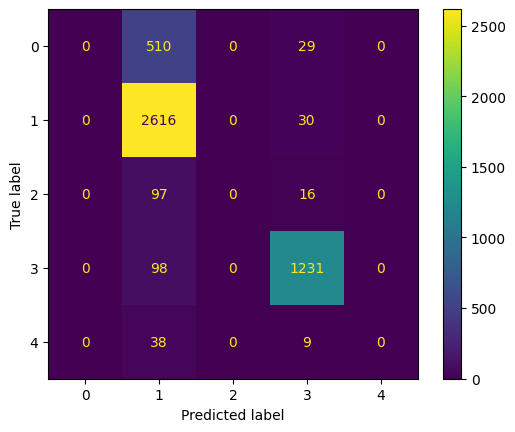

In [53]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(predictions)))

              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00       539
      failed       0.78      0.99      0.87      2646
        live       0.00      0.00      0.00       113
  successful       0.94      0.93      0.93      1329
   suspended       0.00      0.00      0.00        47

    accuracy                           0.82      4674
   macro avg       0.34      0.38      0.36      4674
weighted avg       0.71      0.82      0.76      4674



c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [84]:
{i: label_encoder.inverse_transform([i])[0] for i in range(5)}

{0: 'canceled', 1: 'failed', 2: 'live', 3: 'successful', 4: 'suspended'}

In [93]:
h1_df_binary = h1_df.copy()

In [94]:
def convert_to_binary(row):
    return 1 if row["state"] in [3, 2] else 0

In [95]:
h1_df_binary["state"] = h1_df_binary.apply(convert_to_binary, axis=1)

In [97]:
h1_df_binary["state"].value_counts()

state
0    13020
1     5675
Name: count, dtype: int64

In [96]:
X_binary = h1_df_binary.drop(columns="state")
y_binary = h1_df_binary["state"]

In [98]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, random_state=42
)

In [99]:
logistic_regression_model_binary = LogisticRegression()

In [100]:
logistic_regression_model_binary.fit(X_train_binary, y_train_binary)

LogisticRegression()

In [101]:
logistic_regression_model_binary.score(X_test_binary, y_test_binary)

0.9471544715447154

In [102]:
predictions_binary = logistic_regression_model_binary.predict(X_test_binary)

In [103]:
test_results_binary = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_binary}
)

In [104]:
test_results_binary

,Actual,Predicted
2301,1,1
7589,0,0
251,0,0
6315,0,0
4870,0,0
...,...,...
925,1,1
13377,0,0
18622,0,0
16975,0,1


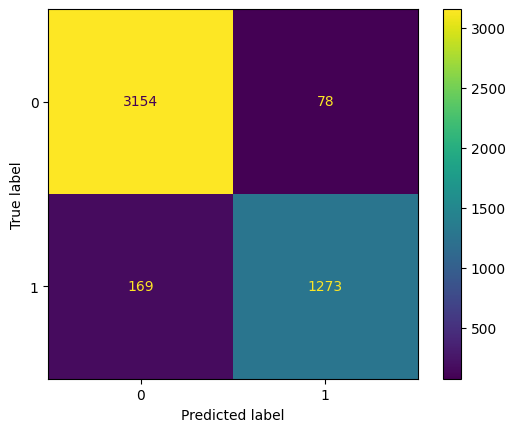

In [105]:
cm = confusion_matrix(y_test_binary, predictions_binary)
ConfusionMatrixDisplay(cm).plot()

In [107]:
print(classification_report(y_test_binary, predictions_binary))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3232
           1       0.94      0.88      0.91      1442

    accuracy                           0.95      4674
   macro avg       0.95      0.93      0.94      4674
weighted avg       0.95      0.95      0.95      4674

